In [3]:
import matplotlib.pyplot as plt
from google.colab import files
files = files.upload()

Saving svm_long_sp_best_results.csv to svm_long_sp_best_results.csv


In [4]:
import pandas as pd
df = pd.read_csv('svm_long_sp_best_results.csv')

In [5]:
prof_list = ['accountant', 'adjunct_professor', 'adventurer', 'ambassador', 'anthropologist', 'archaeologist', 'assasin', 'assistant_professor', 'associate_professor', 'astronaut']

In [6]:
df

,Unnamed: 0,Profession,Female BiasedDB,Male BiasedDB,Prediction BiasedDB,Female DebiasedDB,Male DebiasedDB,Prediction DebiasedDB
0,0,accountant,0.200893,0.799107,male,0.517243,0.482757,female
1,1,acquaintance,0.237036,0.762964,male,0.478063,0.521937,female
2,2,actor,0.031278,0.968722,male,0.553174,0.446826,female
3,3,actress,0.998298,0.001702,female,0.865692,0.134308,female
4,4,adjunct_professor,0.652430,0.347570,female,0.575532,0.424468,female
...,...,...,...,...,...,...,...,...
315,315,warrior,0.133622,0.866378,male,0.647132,0.352868,female
316,316,welder,0.081490,0.918510,male,0.296421,0.703579,male
317,317,worker,0.255046,0.744954,male,0.393357,0.606643,male
318,318,wrestler,0.074172,0.925828,male,0.600764,0.399236,female


In [7]:
df['Bias Diff'] = abs(df['Female BiasedDB'] - df['Male BiasedDB'])

In [8]:
df

,Unnamed: 0,Profession,Female BiasedDB,Male BiasedDB,Prediction BiasedDB,Female DebiasedDB,Male DebiasedDB,Prediction DebiasedDB,Bias Diff
0,0,accountant,0.200893,0.799107,male,0.517243,0.482757,female,0.598213
1,1,acquaintance,0.237036,0.762964,male,0.478063,0.521937,female,0.525927
2,2,actor,0.031278,0.968722,male,0.553174,0.446826,female,0.937443
3,3,actress,0.998298,0.001702,female,0.865692,0.134308,female,0.996595
4,4,adjunct_professor,0.652430,0.347570,female,0.575532,0.424468,female,0.304860
...,...,...,...,...,...,...,...,...,...
315,315,warrior,0.133622,0.866378,male,0.647132,0.352868,female,0.732756
316,316,welder,0.081490,0.918510,male,0.296421,0.703579,male,0.837020
317,317,worker,0.255046,0.744954,male,0.393357,0.606643,male,0.489908
318,318,wrestler,0.074172,0.925828,male,0.600764,0.399236,female,0.851656


In [9]:
df['Debias Diff'] = abs(df['Female DebiasedDB'] - df['Male DebiasedDB'])

In [ ]:
df

,Unnamed: 0,Profession,Female BiasedDB,Male BiasedDB,Prediction BiasedDB,Female DebiasedDB,Male DebiasedDB,Prediction DebiasedDB,Bias Diff,Debias Diff
0,0,accountant,0.200893,0.799107,male,0.517243,0.482757,female,0.598213,0.034486
1,1,acquaintance,0.237036,0.762964,male,0.478063,0.521937,female,0.525927,0.043875
2,2,actor,0.031278,0.968722,male,0.553174,0.446826,female,0.937443,0.106349
3,3,actress,0.998298,0.001702,female,0.865692,0.134308,female,0.996595,0.731385
4,4,adjunct_professor,0.652430,0.347570,female,0.575532,0.424468,female,0.304860,0.151064
...,...,...,...,...,...,...,...,...,...,...
315,315,warrior,0.133622,0.866378,male,0.647132,0.352868,female,0.732756,0.294264
316,316,welder,0.081490,0.918510,male,0.296421,0.703579,male,0.837020,0.407158
317,317,worker,0.255046,0.744954,male,0.393357,0.606643,male,0.489908,0.213286
318,318,wrestler,0.074172,0.925828,male,0.600764,0.399236,female,0.851656,0.201527


In [10]:
df.Profession

0             accountant
1           acquaintance
2                  actor
3                actress
4      adjunct_professor
             ...        
315              warrior
316               welder
317               worker
318             wrestler
319               writer
Name: Profession, Length: 320, dtype: object

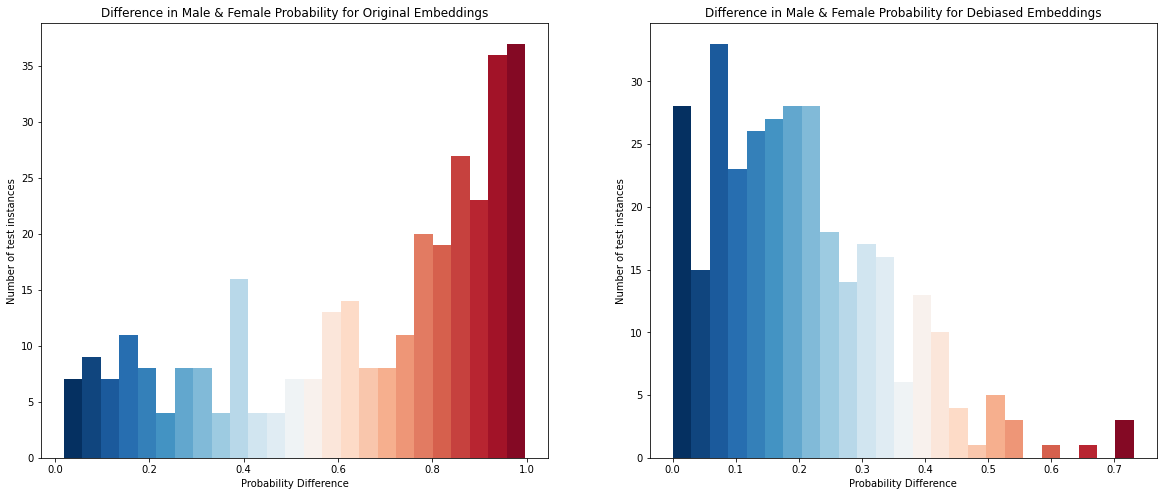

In [11]:
plt.rcParams["figure.figsize"] = (20,8)
fig, ax=plt.subplots(1, 2)

cm = plt.cm.RdBu_r

n, bins, patches = ax[0].hist(df['Bias Diff'], 25,color='green')
for i, p in enumerate(patches):
    plt.setp(p, 'facecolor', cm(i/25)) # notice the i/25
ax[0].set_title('Difference in Male & Female Probability for Original Embeddings')
ax[0].set_xlabel('Probability Difference')
ax[0].set_ylabel('Number of test instances')

 
n, bins, patches = ax[1].hist(df['Debias Diff'], 25, color='green')
for i, p in enumerate(patches):
    plt.setp(p, 'facecolor', cm(i/25)) # notice the i/25
ax[1].set_title('Difference in Male & Female Probability for Debiased Embeddings')
ax[1].set_xlabel('Probability Difference')
ax[1].set_ylabel('Number of test instances')
plt.show()

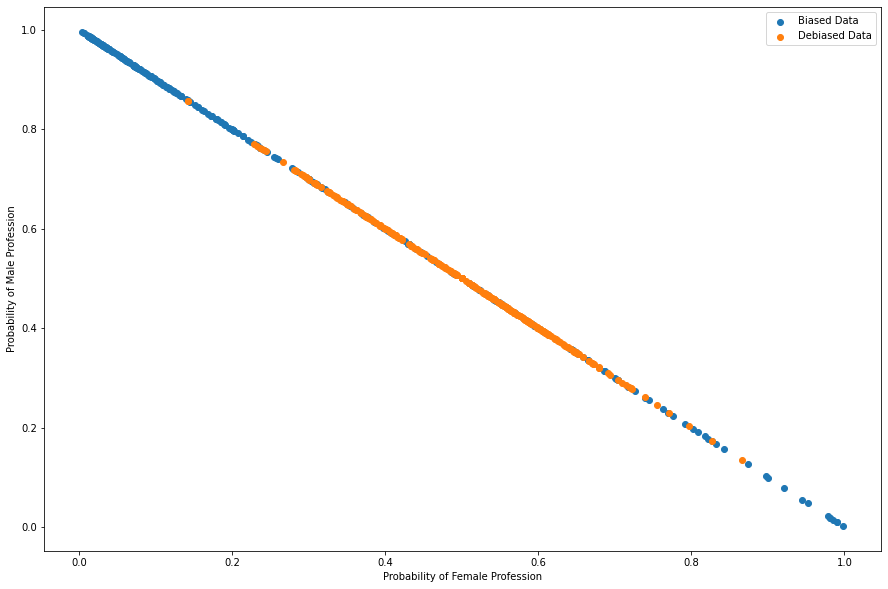

In [12]:
plt.rcParams["figure.figsize"] = (15,10)

plt.scatter(df['Female BiasedDB'], df['Male BiasedDB'], label = "Biased Data", cmap = "plasma")
plt.scatter(df['Female DebiasedDB'], df['Male DebiasedDB'], label = "Debiased Data", cmap = "plasma")
plt.xlabel("Probability of Female Profession")
plt.ylabel("Probability of Male Profession")
plt.legend()

plt.show()

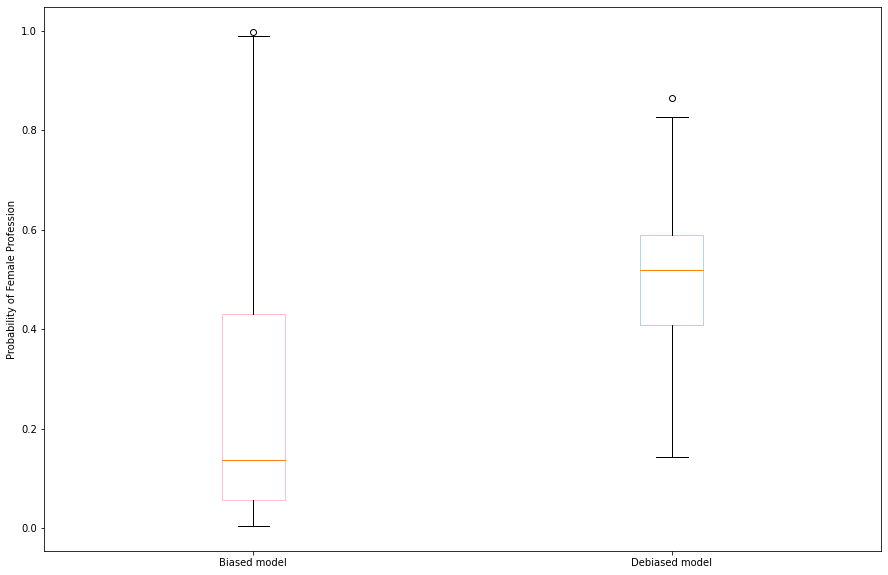

In [27]:
plt.rcParams["figure.figsize"] = (15,10)

bplot = plt.boxplot([df['Female BiasedDB'],df['Female DebiasedDB']], labels = ['Biased model','Debiased model'])
plt.ylabel("Probability of Female Profession")

colors = ['pink', 'lightblue']
for patch, color in zip(bplot['boxes'], colors):
    patch.set(color = color)

plt.show()

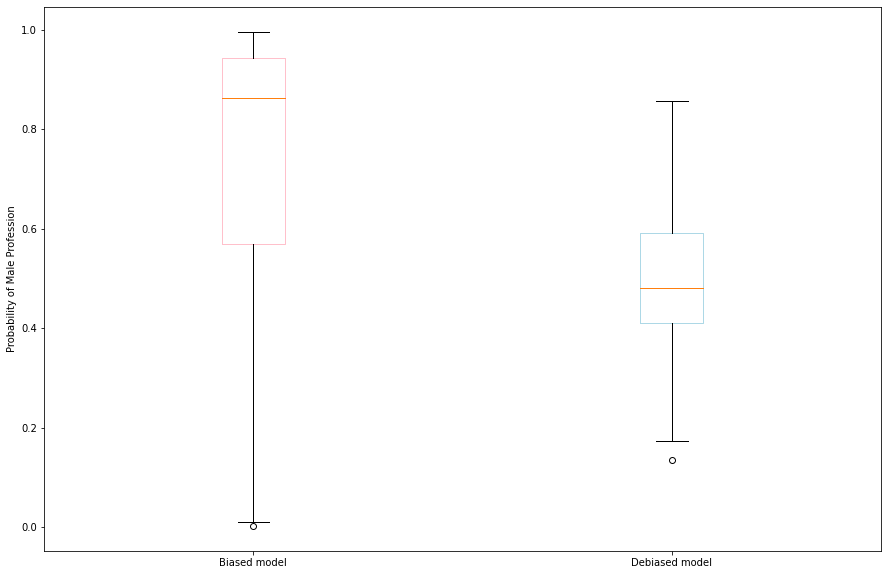

In [26]:
plt.rcParams["figure.figsize"] = (15,10)

bplot = plt.boxplot([df['Male BiasedDB'],df['Male DebiasedDB']],labels = ['Biased model','Debiased model'])
plt.ylabel("Probability of Male Profession")

colors = ['pink', 'lightblue']
for patch, color in zip(bplot['boxes'], colors):
    patch.set(color = color)

plt.show()

In [23]:
print('Biased Model:')
print('Average probability of female prediction: ', df['Female BiasedDB'].mean())
print('Average probability of male prediction: ', df['Male BiasedDB'].mean())
print('Average difference in probabilty of male and female predictions:',abs(df['Female BiasedDB'] - df['Male BiasedDB']).mean())

Biased Model:
Average probability of female prediction:  0.2620237105464993
Average probability of male prediction:  0.7379762894535011
Average difference in probabilty of male and female predictions: 0.6549426420436086


In [24]:
print('Debiased Model:')
print('Average probability of female prediction: ', df['Female DebiasedDB'].mean())
print('Average probability of male prediction: ', df['Male DebiasedDB'].mean())
print('Average difference in probabilty of male and female predictions:',abs(df['Female DebiasedDB'] - df['Male DebiasedDB']).mean())

Debiased Model:
Average probability of female prediction:  0.5021860786098398
Average probability of male prediction:  0.4978139213901603
Average difference in probabilty of male and female predictions: 0.20446704171100719
